<a href="https://colab.research.google.com/github/Joshua-Dias-Barreto/Diabetes-Predictor/blob/main/Diabetes_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction**

The objective of this project is to accurately predict whether a patient has diabetes or not based on certain factors such as their insulin level, skin thickness, age, blood pressure, pregnancies, glucose and BMI.


#Importing the necessary packages:

In [ ]:
import pandas as pd
import matplotlib as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


#Viewing the first five rows of the dataset

In [ ]:
df=pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking if there are any null values present in the dataset

Since there are no null values in this dataset, there is no need to delete or impute any values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Obtaining statistical data of each feature (column) in the dataset 

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.shape

(768, 9)

# Checking if there is sufficient data for both, people with diabetes and people who didn't have diabetes

In this dataset, 268 people had diabetes, while 500 people didn't.

In [ ]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

df.drop(columns="Outcome",axis=1) Assigns all the feature columns of the dataset to X1 except the Outcome column .

The Outcome column is assigned to y .

In [ ]:
X1=df.drop(columns="Outcome",axis=1)
y=df["Outcome"]

# **Standardizing the Data**

Standardization makes all variables contribute equally. All SVM kernel methods are based on distance, hence it is necessary to scale variables prior to running the final Support Vector Machine (SVM) model.

The standardScaler() ,standardizes features by removing the mean and scaling to unit variance.

In [ ]:
X=StandardScaler().fit_transform(X1)
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


# **Splitting the dataset into a training and testing dataset**
**test_size = 0.3 :**

- 30% of the dataset is kept for testing while the model is trained on the rest of the 70%.

**stratify = y :**

- This is done so that there are sufficient positive and negative diabetic outcomes in both, the training dataset and the testing dataset.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=3,stratify=y)

# It can be seen that there is a uniform distribution of 0's and 1's in the testing and training dataset.

In [ ]:
y_test.value_counts()

0    150
1     81
Name: Outcome, dtype: int64

In [ ]:
y_train.value_counts()

0    350
1    187
Name: Outcome, dtype: int64

# **Using Logistic Regression :**

Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.

Logistic regression essentially uses the sigmoid function defined below to model a binary output variable.

sigmoid(z) = 1/ (1 + e<sup>-z</sup>)

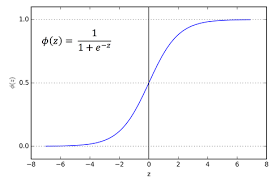

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

# **Confusion_matrix :**
The Confusion_matrix is a 2 x 2 matrix.
Each element denotes the number of True Negatives (TN), False Positives (FP), False Negatives (FN) and True Positives (TP) respectively.

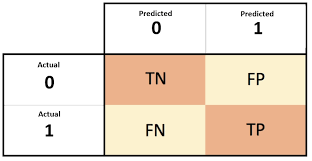

In [ ]:
from sklearn import metrics
cnf=metrics.confusion_matrix(y_test,y_pred)
cnf

array([[131,  19],
       [ 40,  41]])

# **Accuracy :**  
The ratio of correctly predicted observations to the total observations.
# **Precision :**
The ratio of correctly predicted positive observations to the total predicted positive observations.

# **Recall :**
The ratio of correctly predicted positive observations to the all observations in actual class (true positives and true negatives).

In [ ]:
tn=cnf[0][0]
tp=cnf[1][1]
fn=cnf[1][0]
fp=cnf[0][1]
accuracy=(tn+tp)/(tn+tp+fp+fn)
precision=tp/(tp+fp)
recall=tp/(tp+fn)

In [ ]:
print("accuracy",accuracy,"\n")
print("precision",precision,"\n")
print("recall",recall,"\n")

accuracy 0.7445887445887446 

precision 0.6833333333333333 

recall 0.5061728395061729 



 # Displaying accuracy, precision and recall using in-built functions



*   **F1 score** is the harmonic mean between precision and recall
*   **Misclassifictions** are the outputs which were wrongly predicted by the moel.



In [ ]:
print("accuracy",metrics.accuracy_score(y_test,y_pred),"\n")
print("precision",metrics.precision_score(y_test,y_pred),"\n")
print("recall",metrics.recall_score(y_test,y_pred),"\n")
print("F1 score",2*(precision*recall)/(precision+recall))
print("misclassifications",fp+fn)

accuracy 0.7445887445887446 

precision 0.6833333333333333 

recall 0.5061728395061729 

F1 score 0.5815602836879433
misclassifications 59


# **Using SVM :**

# Scikit Learn's in - built SVM model is used with a linear kernel

In [ ]:
from sklearn import svm
sv=svm.SVC(kernel='linear')
sv.fit(X_train,y_train)
y_pred=sv.predict(X_test)

In [ ]:
cnf=metrics.confusion_matrix(y_test,y_pred)
cnf

array([[133,  17],
       [ 38,  43]])

In [ ]:
print("accuracy",metrics.accuracy_score(y_test,y_pred))
print("precision",metrics.precision_score(y_test,y_pred))
print("recall",metrics.recall_score(y_test,y_pred))

accuracy 0.7619047619047619
precision 0.7166666666666667
recall 0.5308641975308642


# **The Performance of both models on the dataset is as follows :**
**Logistic Regression :** 
- accuracy = 74.46 %

- precision = 68.33 %

- recall = 50.62 % 

**SVM :** 
- accuracy = 76.19 %

- precision = 71.67 %

- recall = 53.09 % 


While predicting whether a person has diabetes or not, it is more dangerous to tell a person who actually has diabetes that he doesn't have diabetes rather than to tell a person who doesn't have diabetes that he does.

Hence rather than improving accuracy, the main task is actually to reduce false negatives (increase recall) .